<h1>데이터 그룹화</h1>

<h3>groupby mechanism</h3>

<h4>데이터 확인</h4>

In [2]:
import pandas as pd
import numpy as np

In [29]:
pay_info = pd.read_csv('./../data/pay_info.csv', encoding='CP949')
pay_info

,name,product,pay,price,qty
0,김철수,사과,현금,1000,10
1,김철수,사과,직불카드,2000,15
2,김철수,사과,현금,3000,20
3,김철수,사과,신용카드,6000,10
4,김철수,사과,신용카드,5000,30
5,김철수,포도,현금,3000,15
6,김철수,포도,현금,4000,15
7,김철수,포도,신용카드,1000,10
8,김철수,포도,신용카드,2000,30
9,박영희,사과,현금,3000,20


<h6>'성별'에 따른 '교통비' 집계</h6>

In [30]:
mygrouping = pay_info.groupby('product')['price']
mygrouping.sum().to_frame()

,price
product,
사과,34000
포도,22000


In [31]:
mygrouping.count().to_frame()

,price
product,
사과,9
포도,8


<h6>agg를 사용한 집계 사용</h6>

In [32]:
result = pay_info.groupby('name')['qty'].agg('mean')
result.to_frame()

,qty
name,
김철수,17.222222
박영희,20.000000


<h6>2개 이상의 컬럼에 대한 집계 사용</h6>

In [33]:
result = pay_info.groupby(['name', 'product'])['price'].agg('mean')
result.to_frame()

price
name product        
김철수  사과       3400.0
     포도       2500.0
박영희  사과       4250.0
     포도       3000.0

In [53]:
result = pay_info.groupby(['product', 'name']).agg({'price':['sum', 'max']})
result

price      
                sum   max
product name             
사과      김철수   17000  6000
        박영희   17000  5000
포도      김철수   10000  4000
        박영희   12000  5000

In [55]:
outer_column = result.columns.get_level_values(0)
outer_column

Index(['price', 'price'], dtype='object')

In [56]:
hangul_dict = {'sum':'총합', 'mean':'평균', 'max':'최대', 'min':'최소'}
inner_column = result.columns.get_level_values(1)
inner_column = [hangul_dict[item] for item in inner_column.tolist()]
inner_column

['총합', '최대']

In [57]:
result.columns = outer_column + '_' + inner_column
result

price_총합  price_최대
product name                    
사과      김철수      17000      6000
        박영희      17000      5000
포도      김철수      10000      4000
        박영희      12000      5000

In [59]:
result.reset_index()

,product,name,price_총합,price_최대
0,사과,김철수,17000,6000
1,사과,박영희,17000,5000
2,포도,김철수,10000,4000
3,포도,박영희,12000,5000


<h3><font color="blue">agg() 함수 커스터마이징</font></h3>

In [76]:
def get_rate(data):
    return (data=='사과').mean()

In [77]:
result = pay_info.groupby('name')['product'].agg(get_rate)
result.to_frame()

,product
name,
김철수,0.555556
박영희,0.500000


In [78]:
def get_rate_pct(data, fruit):
    return (data==fruit).mean()

In [79]:
result = pay_info.groupby('name')['product'].agg(get_rate_pct, '포도')
result.to_frame()

,product
name,
김철수,0.444444
박영희,0.500000


<h3>groupby 객체 살펴 보기</h3>

In [69]:
pay_info = pd.read_csv('./../data/pay_info.csv', encoding='CP949')
pay_info

,name,product,pay,price,qty
0,김철수,사과,현금,1000,10
1,김철수,사과,직불카드,2000,15
2,김철수,사과,현금,3000,20
3,김철수,사과,신용카드,6000,10
4,김철수,사과,신용카드,5000,30
5,김철수,포도,현금,3000,15
6,김철수,포도,현금,4000,15
7,김철수,포도,신용카드,1000,10
8,김철수,포도,신용카드,2000,30
9,박영희,사과,현금,3000,20


In [70]:
# groupby() 메소드를 적절히 사용하여 그룹이 ['사과', '현금']인 데이터만 추출해 보세요.
mygrouping = pay_info.groupby(['product', 'pay'])
mygrouping

In [72]:
group_list = list(mygrouping.groups.keys())
print(group_list)

[('사과', '신용카드'), ('사과', '직불카드'), ('사과', '현금'), ('포도', '신용카드'), ('포도', '현금')]


In [75]:
result = mygrouping.get_group(('사과', '현금'))
result

,name,product,pay,price,qty
0,김철수,사과,현금,1000,10
2,김철수,사과,현금,3000,20
9,박영희,사과,현금,3000,20
10,박영희,사과,현금,4000,15


<h3><font color="blue">연속형 변수의 범주화와 그룹핑</font></h3>

In [55]:
import pandas as pd
import numpy as np

<h4><font color="red">복지 데이터 읽기</font></h4>

<h6><font color="green">기본 열 색인 정보 확인</font></h6>

In [84]:
tips = pd.read_csv('./../data/tips.csv', encoding='CP949')
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [85]:
chartdata = tips.groupby('sex')['total_bill'].mean()
chartdata.to_frame()

,total_bill
sex,
Female,18.056897
Male,20.744076


In [89]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

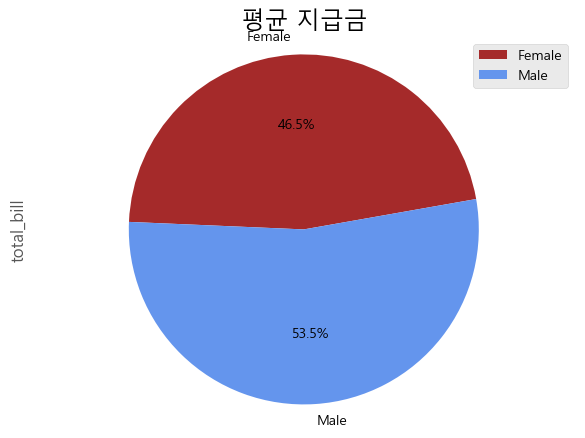

In [102]:
plt.style.use('ggplot') 

# https://www.w3schools.com/colors/colors_names.asp
chartdata.plot(kind='pie',figsize=(7, 5),autopct='%1.1f%%',
         startangle=10, colors=['Brown', 'CornflowerBlue', 'DarkKhaki'])

plt.title('평균 지급금', size=17)
plt.axis('equal') 
plt.legend(labels=chartdata.index, loc='upper right')

Text(0, 0.5, '팁비')

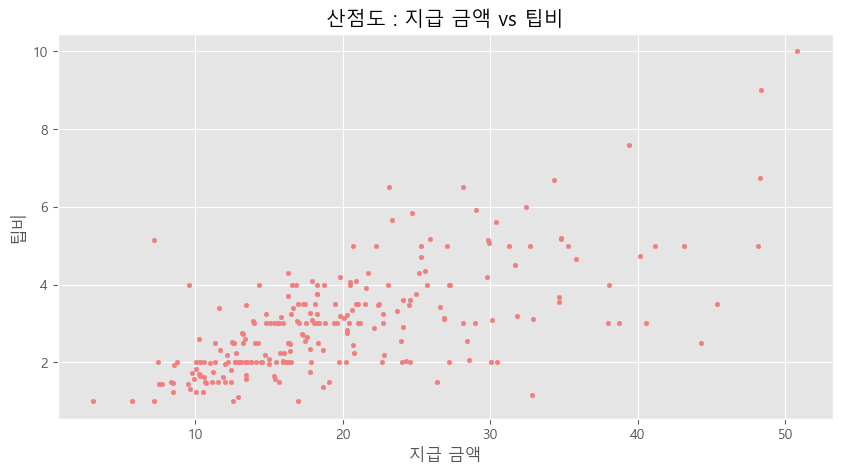

In [105]:
tips.plot(kind='scatter', x='total_bill', y='tip',  c='LightCoral', \
             s=10, figsize=(10, 5))
plt.title('산점도 : 지급 금액 vs 팁비')
plt.xlabel('지급 금액')
plt.ylabel('팁비')

In [106]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

Text(0.5, 1.0, '시간대별 지불 금액(박스 플롯)')

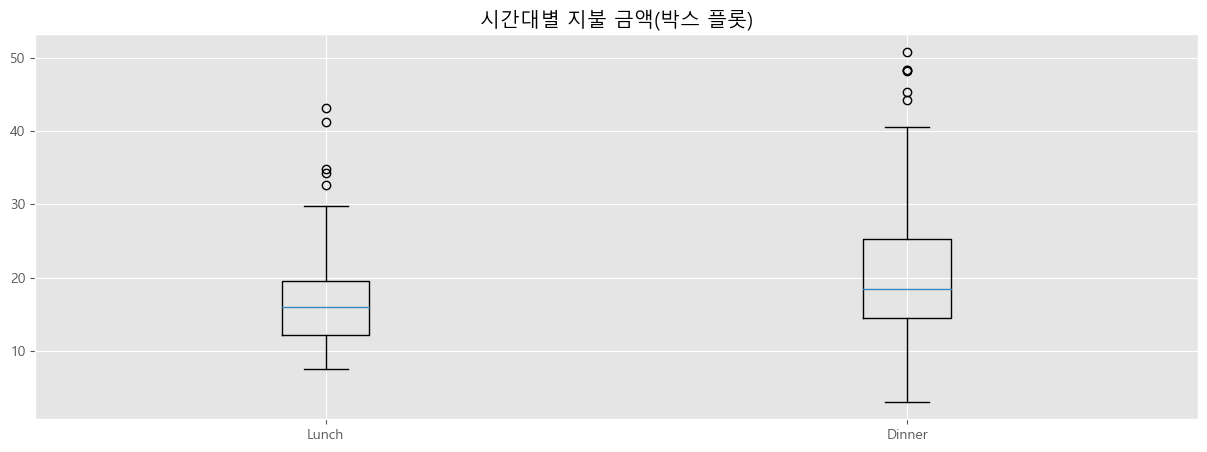

In [109]:
plt.style.use('ggplot') 
plt.figure(figsize=(15, 5))   

plt.boxplot(x=[tips[tips['time']=='Lunch']['total_bill'],
               tips[tips['time']=='Dinner']['total_bill']], 
         labels=['Lunch', 'Dinner'], vert=True)

plt.title('시간대별 지불 금액(박스 플롯)')

<h6><font color="green">(그래프)히스토그램 그리기</font></h6>

Text(0.5, 0, '지급 금액')

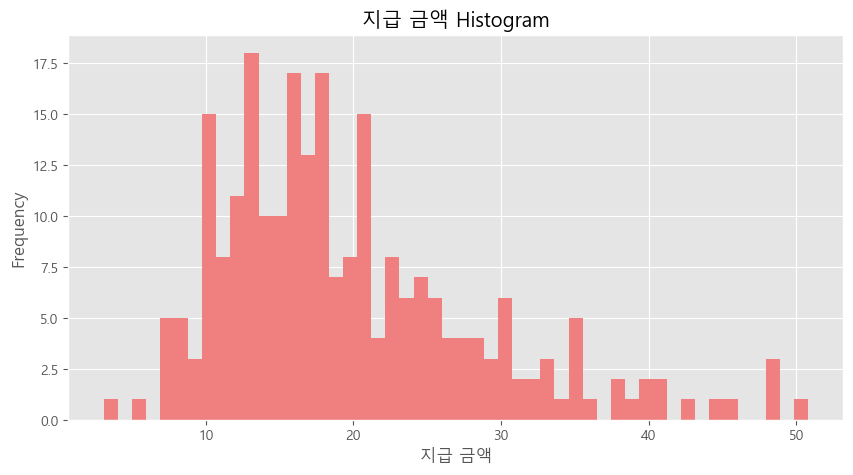

In [111]:
tips['total_bill'].plot(kind='hist', bins=50, color='LightCoral', figsize=(10, 5))
plt.title('지급 금액 Histogram')
plt.xlabel('지급 금액')

<h6><font color="green">데이터 이산화</font></h6>

In [113]:
tips['tip'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
tip,244.0,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0


In [115]:
labels=['low', 'middle', 'high']
cuts_label = pd.cut(tips['tip'], bins=bins, labels=labels)

tips['범주형tip'] = cuts_label
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,범주형tip
0,16.99,1.01,Female,No,Sun,Dinner,2,low
1,10.34,1.66,Male,No,Sun,Dinner,3,low
2,21.01,3.50,Male,No,Sun,Dinner,3,high
3,23.68,3.31,Male,No,Sun,Dinner,2,high
4,24.59,3.61,Female,No,Sun,Dinner,4,high
5,25.29,4.71,Male,No,Sun,Dinner,4,high
6,8.77,2.00,Male,No,Sun,Dinner,2,low
7,26.88,3.12,Male,No,Sun,Dinner,4,high
8,15.04,1.96,Male,No,Sun,Dinner,2,low
9,14.78,3.23,Male,No,Sun,Dinner,2,high


<h6><font color="green">(그래프)지역별 소득의 평균</font></h6>

In [116]:
chartdata = tips.groupby(['sex', '범주형tip'])['total_bill'].mean()
chartdata.to_frame()

total_bill
sex    범주형tip            
Female low      14.057750
       middle   17.034000
       high     23.535312
Male   low      15.160441
       middle   22.368696
       high     25.930758

<h6><font color="green">요일(day)별 최대 total_bill</font></h6>

In [119]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [117]:
tips['rank'] = tips.groupby('day')['total_bill']. \
    rank(method='first', ascending=False)
tips

,total_bill,tip,sex,smoker,day,time,size,범주형tip,rank
0,16.99,1.01,Female,No,Sun,Dinner,2,low,49.0
1,10.34,1.66,Male,No,Sun,Dinner,3,low,68.0
2,21.01,3.50,Male,No,Sun,Dinner,3,high,34.0
3,23.68,3.31,Male,No,Sun,Dinner,2,high,27.0
4,24.59,3.61,Female,No,Sun,Dinner,4,high,23.0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,high,13.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,low,16.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,low,26.0
242,17.82,1.75,Male,No,Sat,Dinner,2,low,47.0


In [120]:
result = tips[tips['rank'] == 1.0]
result

,total_bill,tip,sex,smoker,day,time,size,범주형tip,rank
95,40.17,4.73,Male,Yes,Fri,Dinner,4,high,1.0
156,48.17,5.00,Male,No,Sun,Dinner,6,high,1.0
170,50.81,10.00,Male,Yes,Sat,Dinner,3,high,1.0
197,43.11,5.00,Female,Yes,Thur,Lunch,4,high,1.0


In [121]:
result = result.drop(columns=['rank'])
result

,total_bill,tip,sex,smoker,day,time,size,범주형tip
95,40.17,4.73,Male,Yes,Fri,Dinner,4,high
156,48.17,5.00,Male,No,Sun,Dinner,6,high
170,50.81,10.00,Male,Yes,Sat,Dinner,3,high
197,43.11,5.00,Female,Yes,Thur,Lunch,4,high
